       Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
count         48.000000        48.000000              48.000000   
mean           7.668333      4241.833333            5565.416667   
std            0.950770       573.623768            3491.507166   
min            5.000000      3063.000000             431.000000   
25%            7.000000      3739.000000            3110.250000   
50%            7.500000      4298.000000            4735.500000   
75%            8.125000      4578.750000            7156.000000   
max           10.000000      5342.000000           17782.000000   

       Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
count                        48.000000       48.000000  
mean                          0.570333      576.770833  
std                           0.055470      111.885816  
min                           0.451000      344.000000  
25%                           0.529750      509.500000  
50%                           0.564500      568.500000

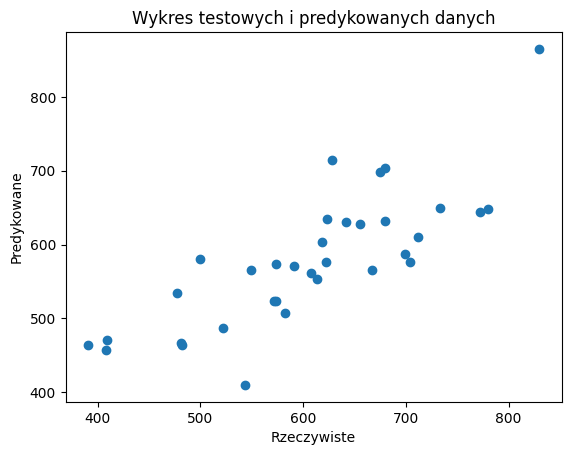

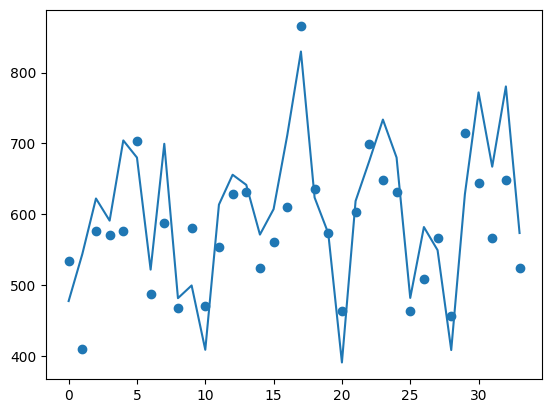

Mean Absolute Error: 57.37807688987885
Mean Squared Error: 4798.872014755167
Root Mean Squared Error: 69.27389129213954


In [111]:
import patsy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#To same podejscie tylko dla pliku PETROL.csv
df4=pd.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\laboratorium-lin-model-Matyiashchyk\\PETROL.csv")
print(df4.describe(include='all'))
print(df4.shape)
#################################
X_Wiek = df4.drop('Zuzycie_paliwa', axis = 1)  
y_SBP = df4['Zuzycie_paliwa']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Wiek, y_SBP, test_size=0.7, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train1, y_train1)

#
print(regressor.intercept_)
#
print(regressor.coef_)
###################################
y_pred1 = regressor.predict(X_test1)
df4 = pd.DataFrame({'Rzeczywiste': y_test1, 'Predykowane': y_pred1})
print(df4)
plt.scatter(y_pred1, y_test1)
plt.xlabel('Rzeczywiste') 
plt.ylabel('Predykowane') 
plt.title('Wykres testowych i predykowanych danych')
plt.show()
X_test1=np.arange(0,len(X_test1),1)
plt.title('Wykres konfrantujący')
plt.scatter(X_test1, y_test1)
plt.plot(X_test1, y_pred1)
plt.show()
# # Walidacja danych. 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

In [ ]:
# No jak pokazuje nam walidacja błędów to mamy bardzo duże błędy w tym algorytmie, co również, po zrobieniu X_test1 w takim samym rozmiarze co 
#y_test1 i y_pred1, sprawdza się na wykresie